In [ ]:
import keras
import pandas as pd
import numpy as np
from keras.datasets import cifar10 
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [0]:
#Loading Cifar10 Dataset
(x_train, y_train),(x_test,y_test)=cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [0]:
X_train = x_train
test_X = x_test

In [6]:
print(y_test[100])

[4]


In [7]:
y_test.shape

(10000, 1)

In [0]:
#One Hot Encoding
test_Y = to_categorical(y_test)
Y_train = to_categorical(y_train)

In [14]:
test_Y[100]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

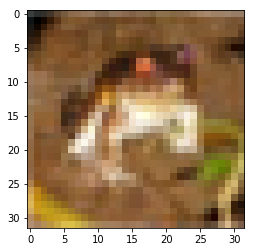

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [15]:
plt.imshow(X_train[0])
plt.show()
Y_train[0]

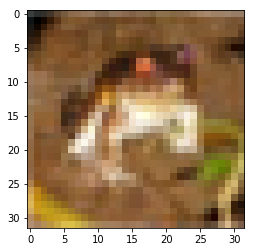

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
plt.imshow(X_train[0])
plt.show()
Y_train[0]

In [0]:
#Creating Validation Data
  train_X,val_X, train_Y, val_Y = train_test_split(X_train, Y_train, test_size=0.3)

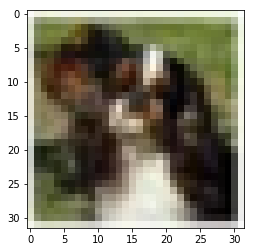

In [18]:
plt.imshow(X_train[500])
plt.show()

In [21]:
cifar10_model = Sequential()
cifar10_model.add(Conv2D(32, kernel_size=(5,5),activation=LeakyReLU(alpha=0.1),kernel_initializer='he_normal',input_shape=(32,32,3),padding='same'))
cifar10_model.add(BatchNormalization())
cifar10_model.add(Conv2D(64, (5, 5), activation=LeakyReLU(alpha=0.1),padding='same'))
cifar10_model.add(LeakyReLU(alpha=0.1))
cifar10_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cifar10_model.add(Dropout(0.2))

cifar10_model.add(Conv2D(128, (5, 5), activation=LeakyReLU(alpha=0.1),padding='same'))
cifar10_model.add(Conv2D(128, (5, 5), activation=LeakyReLU(alpha=0.1),padding='same'))

cifar10_model.add(LeakyReLU(alpha=0.1))                  
cifar10_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cifar10_model.add(Dropout(0.2))
cifar10_model.add(Conv2D(256, (5, 5), activation=LeakyReLU(alpha=0.1),padding='same'))
cifar10_model.add(Conv2D(256, (5, 5), activation=LeakyReLU(alpha=0.1),padding='same'))

cifar10_model.add(LeakyReLU(alpha=0.1))                  
cifar10_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
cifar10_model.add(Flatten())
cifar10_model.add(Dense(512, activation=LeakyReLU(alpha=0.1)))
cifar10_model.add(Dense(256, activation=LeakyReLU(alpha=0.1)))
cifar10_model.add(Dropout(0.3))
#cifar10_model.add(LeakyReLU(alpha=0.1))  
cifar10_model.add(Dense(10, activation='softmax'))

W0615 14:57:43.742175 139871819880320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/keras/activations.py:211: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))
W0615 14:57:43.780050 139871819880320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0615 14:57:43.786445 139871819880320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.r

In [22]:
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-4, momentum=0.9, nesterov=True)
cifar10_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=sgd,metrics=['accuracy'])

W0615 14:57:57.016926 139871819880320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [23]:
model_train = cifar10_model.fit(train_X, train_Y, batch_size=30,epochs=5,verbose=1,validation_data=(val_X, val_Y))

W0615 14:58:06.323321 139871819880320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 35000 samples, validate on 15000 samples
Epoch 1/5
35000/35000 [==============================] - 30s 865us/step - loss: 1.6829 - acc: 0.3783 - val_loss: 1.3800 - val_acc: 0.4988
Epoch 2/5
35000/35000 [==============================] - 26s 740us/step - loss: 1.2950 - acc: 0.5378 - val_loss: 1.1489 - val_acc: 0.5825
Epoch 3/5
35000/35000 [==============================] - 26s 746us/step - loss: 1.0931 - acc: 0.6149 - val_loss: 1.0114 - val_acc: 0.6393
Epoch 4/5
35000/35000 [==============================] - 26s 755us/step - loss: 0.9499 - acc: 0.6669 - val_loss: 0.9006 - val_acc: 0.6780
Epoch 5/5
35000/35000 [==============================] - 26s 753us/step - loss: 0.8308 - acc: 0.7085 - val_loss: 0.8768 - val_acc: 0.6881


In [24]:
#Test Model
test_model = cifar10_model.evaluate(test_X, test_Y, verbose=1)

10000/10000 [==============================] - 2s 235us/step


In [25]:
print("Accuracy:",test_model[1]*100)
print("Loss:",test_model[0])

Accuracy: 68.21000000000001
Loss: 0.9021784379005432


In [0]:
#pred=cifar10_model.predict_classes(test_X, verbose=1)

In [27]:
print(cifar10_model.summary())
print("Accuracy:",test_model[1]*100)
print("Loss:",test_model[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        51264     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       204928    
__________

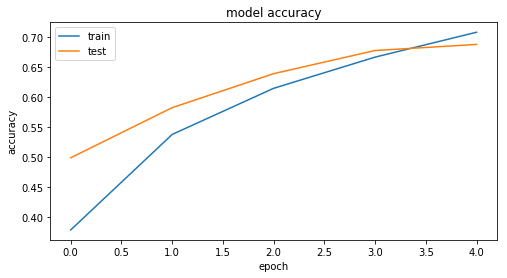

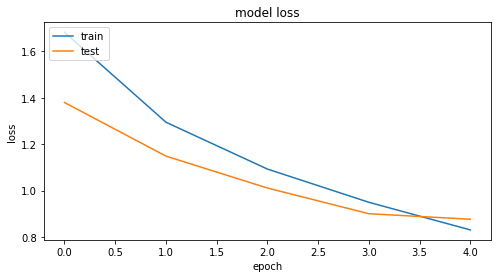

In [28]:
# Accuracy Curve
plt.figure(figsize=(8,4))
plt.plot(model_train.history['acc'])
plt.plot(model_train.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss Curve
plt.figure(figsize=(8,4))
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()